In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('spam_list.csv',encoding = "ISO-8859-1")

In [7]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [8]:
df.shape

(5599, 5)

#### Steps to be done
#### 1.Data Cleaning
#### 2.EDA
#### 3.Text Preprocessing # vectorization
#### 4.Model Building
#### 5.Evaluation
#### 6.Improvements based on Evaluation
#### 7.Made a website
#### 8.Deploy on heroku

In [9]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5549
Unnamed: 3    5587
Unnamed: 4    5593
dtype: int64

# DATA CLEANING

In [10]:
df=df.drop(axis=1,columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'])
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5594,spam,Holi Special Deal: 84% OFF on Full Body Checku...
5595,spam,Along with quick delivery - use code PEH20. Hu...
5596,spam,"While receiving an international call, if an I..."
5597,spam,During Vigilance Awareness Week (VAW)-2021 26t...


In [11]:
df.rename(columns={'v1':'label','v2':'message'},inplace=True)
df

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5594,spam,Holi Special Deal: 84% OFF on Full Body Checku...
5595,spam,Along with quick delivery - use code PEH20. Hu...
5596,spam,"While receiving an international call, if an I..."
5597,spam,During Vigilance Awareness Week (VAW)-2021 26t...


In [12]:
df['message'][2]

"Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"

In [13]:
df['label'].value_counts()/5599*100 # 86% ham  13% spam

ham     86.176103
spam    13.823897
Name: label, dtype: float64

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
encoder=LabelEncoder()

In [16]:
df['label']=encoder.fit_transform(df['label'])
df

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5594,1,Holi Special Deal: 84% OFF on Full Body Checku...
5595,1,Along with quick delivery - use code PEH20. Hu...
5596,1,"While receiving an international call, if an I..."
5597,1,During Vigilance Awareness Week (VAW)-2021 26t...


In [17]:
# ham --> 0
# spam --> 1

In [18]:
#Missing Value Check
df.isnull().sum()

label      0
message    0
dtype: int64

In [19]:
#Check for duplicates
df.duplicated().sum()

404

In [20]:
df=df.drop_duplicates()
df

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5594,1,Holi Special Deal: 84% OFF on Full Body Checku...
5595,1,Along with quick delivery - use code PEH20. Hu...
5596,1,"While receiving an international call, if an I..."
5597,1,During Vigilance Awareness Week (VAW)-2021 26t...


In [21]:
df.reset_index(inplace=True,drop=True)
df

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5190,1,Holi Special Deal: 84% OFF on Full Body Checku...
5191,1,Along with quick delivery - use code PEH20. Hu...
5192,1,"While receiving an international call, if an I..."
5193,1,During Vigilance Awareness Week (VAW)-2021 26t...


# EDA

In [22]:
df['label'].value_counts()

0    4516
1     679
Name: label, dtype: int64

In [23]:
#Proportion of ham and spam
df['label'].value_counts()/5195*100 # 86% ham  13% spam

0    86.92974
1    13.07026
Name: label, dtype: float64

In [24]:
import matplotlib.pyplot as plt

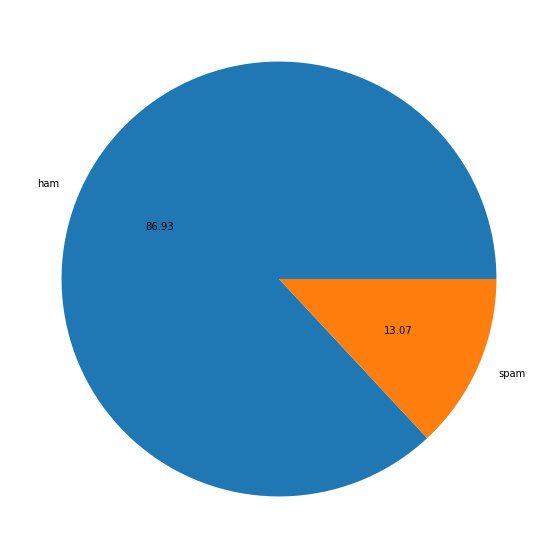

In [25]:
plt.figure(figsize=(10,10))
plt.pie(df['label'].value_counts(),autopct='%2.2f',labels=['ham','spam'])
plt.show()

##### DATA IS IMBALANCE

In [26]:
df['num_characters']=df['message'].apply(len)

C:\Users\adila\AppData\Local\Temp/ipykernel_8352/1098321106.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_characters']=df['message'].apply(len)


In [27]:
import nltk

In [28]:
for i in df['message']:
    print(len(nltk.sent_tokenize(i)),'   :   ',nltk.sent_tokenize(i))

2    :    ['Go until jurong point, crazy..', 'Available only in bugis n great world la e buffet... Cine there got amore wat...']
2    :    ['Ok lar...', 'Joking wif u oni...']
2    :    ['Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005.', "Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"]
1    :    ['U dun say so early hor... U c already then say...']
1    :    ["Nah I don't think he goes to usf, he lives around here though"]
4    :    ["FreeMsg Hey there darling it's been 3 week's now and no word back!", "I'd like some fun you up for it still?", 'Tb ok!', 'XxX std chgs to send, å£1.50 to rcv']
2    :    ['Even my brother is not like to speak with me.', 'They treat me like aids patent.']
2    :    ["As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers.", 'Press *9 to copy your friends Callertune']
5    :    ['WINNER!!', 'As a valued network customer you have been

1    :    ['Thank You for calling.Forgot to say Happy Onam to you Sirji.I am fine here and remembered you when i met an insurance person.Meet You in Qatar Insha Allah.Rakhesh, ex Tata AIG who joined TISSCO,Tayseer.']
2    :    ['Ur cash-balance is currently 500 pounds - to maximize ur cash-in now send CASH to 86688 only 150p/msg.', 'CC: 08708800282 HG/Suite342/2Lands Row/W1J6HL']
4    :    ["I'm an actor.", 'When i work, i work in the evening and sleep late.', "Since i'm unemployed at the moment, i ALWAYS sleep late.", "When you're unemployed, every day is saturday."]
4    :    ['Hello!', 'Just got here, st andrews-boy its a long way!', 'Its cold.', 'I will keep you posted']
1    :    ['Ha ha cool cool chikku chikku:-):-DB-)']
1    :    ['Oh ok no prob..']
1    :    ["Check audrey's status right now"]
3    :    ['Busy here.', 'Trying to finish for new year.', 'I am looking forward to finally meeting you...']
5    :    ['Good afternoon sunshine!', 'How dawns that day ?', 'Are we refresh

3    :    ['\\BOO BABE!', 'U ENJOYIN YOURJOB?', 'U SEEMED 2 B GETTIN ON WELL HUNNY!HOPE URE OK?TAKE CARE & IåÕLLSPEAK 2U SOONLOTS OF LOVEME XXXX.\\""']
5    :    ['Good afternoon starshine!', "How's my boytoy?", 'Does he crave me yet?', 'Ache to fuck me ?', '*sips cappuccino* I miss you babe *teasing kiss*']
1    :    ['On the road so cant txt']
4    :    ['SMSSERVICES.', 'for yourinclusive text credits, pls goto www.comuk.net login= 3qxj9 unsubscribe with STOP, no extra charge.', 'help 08702840625.COMUK.', '220-CM2 9AE']
3    :    ["25p 4 alfie Moon's Children in need song on ur mob.", 'Tell ur m8s.', 'Txt Tone charity to 8007 for Nokias or Poly charity for polys: zed 08701417012 profit 2 charity.']
2    :    ['Hmm ..', 'Bits and pieces lol ... *sighs* ...']
1    :    ['Hahaha..use your brain dear']
2    :    ['Hey.', 'You got any mail?']
1    :    ['Sorry light turned green, I meant another friend wanted  &lt;#&gt;  worth but he may not be around']
4    :    ['Thanks for yesterday si

2    :    ['I tot u reach liao.', 'He said t-shirt.']
1    :    ['FRAN I DECIDED 2 GO N E WAY IM COMPLETELY BROKE AN KNACKERED I GOT UP BOUT 3 C U 2MRW LOVE JANX P.S THIS IS MY DADS FONE, -NO CREDIT']
2    :    ['Your right!', "I'll make the appointment right now."]
1    :    ['Designation is software developer and may be she get chennai:)']
4    :    ['Enjoy the jamster videosound gold club with your credits for 2 new videosounds+2 logos+musicnews!', 'get more fun from jamster.co.uk!', '16+only Help?', 'call: 09701213186']
3    :    ['Get 3 Lions England tone, reply lionm 4 mono or lionp 4 poly.', '4 more go 2 www.ringtones.co.uk, the original n best.', 'Tones 3GBP network operator rates apply']
1    :    ['I jokin oni lar.. ÌÏ busy then i wun disturb Ì_.']
2    :    ['Ok, be careful !', "Don't text and drive !"]
3    :    ['I.ll always be there, even if its just in spirit.', 'I.ll get a bb soon.', 'Just trying to be sure i need it.']
3    :    ['U r too much close to my heart.', 'If 

2    :    ['No dear i do have free messages without any recharge.', 'Hi hi hi']
1    :    ['I dun believe u. I thk u told him.']
2    :    ['Do you know why god created gap between your fingers..?', 'So that, One who is made for you comes &amp; fills those gaps by holding your hand with LOVE..!']
2    :    ['Yes:)sura in sun tv.', ':)lol.']
1    :    ['Arun can u transfr me d amt']
1    :    ["Takin a shower now but yeah I'll leave when I'm done"]
1    :    ['Am not working but am up to eyes in philosophy so will text u later when a bit more free for chat...']
1    :    ['U havenåÕt lost me ill always b here 4u.i didnåÕt intend 2 hurt u but I never knew how u felt about me when Iwas+marine&thatåÕs what itried2tell urmom.i careabout u']
3    :    ['WIN: We have a winner!', 'Mr. T. Foley won an iPod!', 'More exciting prizes soon, so keep an eye on ur mobile or visit www.win-82050.co.uk']
2    :    ['You bad girl.', 'I can still remember them']
2    :    ['How much i gave to you.', 'Morni

3    :    ['SplashMobile: Choose from 1000s of gr8 tones each wk!', 'This is a subscrition service with weekly tones costing 300p.', 'U have one credit - kick back and ENJOY']
1    :    ['Did you show him and wot did he say or could u not c him 4 dust?']
1    :    ['It should take about  &lt;#&gt;  min']
4    :    ['Not heard from U4 a while.', 'Call 4 rude chat private line 01223585334 to cum.', 'Wan 2C pics of me gettin shagged then text PIX to 8552.', '2End send STOP 8552 SAM xxx']
2    :    ['<Forwarded from 88877>FREE entry into our å£250 weekly comp just send the word ENTER to 88877 NOW.', '18 T&C www.textcomp.com']
1    :    ['Finish liao... U?']
1    :    ['88066 FROM 88066 LOST 3POUND HELP']
1    :    ['Haha i think i did too']
1    :    ['U know we watchin at lido?']
1    :    ['Life spend with someone for a lifetime may be meaningless but a few moments spent with someone who really love you means more than life itself..']
2    :    ["Haha awesome, I've been to 4u a couple ti

4    :    ['Hey sexy buns!', 'What of that day?', 'No word from you this morning on YM ... :-( ...', 'I think of you']
1    :    ['And whenever you and i see we can still hook up too.']
1    :    ["Nope but i'm going home now then go pump petrol lor... Like going 2 rain soon..."]
1    :    ['Can you use foreign stamps for whatever you send them off for?']
1    :    ['FROM 88066 LOST å£12 HELP']
2    :    ['Oh baby of the house.', 'How come you dont have any new pictures on facebook']
4    :    ['Feb  &lt;#&gt;  is \\I LOVE U\\" day.', 'Send dis to all ur \\"VALUED FRNDS\\" evn me.', "If 3 comes back u'll gt married d person u luv!", 'If u ignore dis u will lose ur luv 4 Evr"']
4    :    ["Hiya, sorry didn't hav signal.", "I haven't seen or heard from and neither has, which is unusual in itself!", "I'll put on the case and get him to sort it out!", 'Hugs and snogs.']
1    :    ['Omw back to tampa from west palm, you hear what happened?']
1    :    ['Yup no more already... Thanx 4 printi

4    :    ['This is the 2nd time we have tried 2 contact u. U have won the 750 Pound prize.', '2 claim is easy, call 08712101358 NOW!', 'Only 10p per min.', 'BT-national-rate']
2    :    ['X2  &lt;#&gt; .', 'Are you going to get that']
3    :    ['Hi neva worry bout da truth coz the truth will lead me 2 ur heart.', 'ItåÕs the least a unique person like u deserve.', 'Sleep tight or morning']
2    :    ['UR awarded a City Break and could WIN a å£200 Summer Shopping spree every WK.', 'Txt STORE to 88039.SkilGme.TsCs087147403231Winawk!Age16+å£1.50perWKsub']
1    :    ['Is ur paper today in e morn or aft?']
1    :    ['I will lick up every drop :) are you ready to use your mouth as well?']
3    :    ['And you!', 'Will expect you whenever you text!', 'Hope all goes well tomo']
2    :    ['Great.', 'P diddy is my neighbor and comes for toothpaste every morning']
2    :    ['I av a new number,  .', 'Wil u only use this one,ta.']
3    :    ['So its to be poking man everyday that they teach you 

1    :    ['Hello, As per request from  &lt;#&gt;  Rs.5 has been transfered to you']
2    :    ['I am in tirupur.', 'call you da.']
3    :    ['You are a winner you have been specially selected to receive å£1000 cash or a å£2000 award.', 'Speak to a live operator to claim call 087147123779am-7pm.', 'Cost 10p']
1    :    ['S:)but he had some luck.2 catches put down:)']
1    :    ['How i noe... Did Ì_ specify da domain as nusstu... ÌÏ still in sch...']
3    :    ['Oh...i asked for fun.', 'Haha...take care.', 'Ì_']
1    :    ['Shall i get my pouch?']
6    :    ['Hey loverboy!', 'I love you !!', 'I had to tell ...', 'I look at your picture and ache to feel you between my legs ... Fuck I want you ...', 'I need you ...', 'I crave you .']
3    :    ['How is my boy?', 'No sweet words left for me this morning ... *sighs* ... How goes you day, my love ?', 'Did you start your studying?']
1    :    ['Kent vale lor... ÌÏ wait 4 me there ar?']
3    :    ['Ok.', 'Very good.', 'Its all about making th

1    :    ['How much for an eighth?']
4    :    ['Omg Joanna is freaking me out.', "She's looked thru all my friends to find photos of me.", "And then she's asking about stuff on my MySpace which I haven't even logged on in like a year.", ':/']
3    :    ["Send ur birthdate with month and year, I will tel u ur LIFE PARTNER'S name.", 'and the method of calculation.', 'Reply must.']
3    :    ['Juz now havent woke up so a bit blur blur... Can?', 'Dad went out liao...', 'I cant cum now oso...']
1    :    ['How about clothes, jewelry, and trips?']
2    :    ['Block Breaker now comes in deluxe format with new features and great graphics from T-Mobile.', 'Buy for just å£5 by replying GET BBDELUXE and take the challenge']
3    :    ['Aah!', 'A cuddle would be lush!', "I'd need lots of tea and soup before any kind of fumbling!"]
2    :    ['important information 4 orange user .', "today is your lucky day!2find out why log onto http://www.urawinner.com THERE'S A FANTASTIC SURPRISE AWAITING YOU!

3    :    ['Cashbin.co.uk (Get lots of cash this weekend!)', 'www.cashbin.co.uk Dear Welcome to the weekend We have got our biggest and best EVER cash give away!!', 'These..']
1    :    ['Ok lor... Or u wan me go look 4 u?']
1    :    ["U wan 2 haf lunch i'm in da canteen now."]
5    :    ["Don't make life too stressfull..", 'Always find time to Laugh..', 'It may not add years to your Life!', 'But surely adds more life to ur years!!', 'Gud ni8..swt dreams..']
1    :    ["hey, looks like I was wrong and one of the kappa guys numbers is still on my phone, if you want I can text him and see if he's around"]
3    :    ['Thanks 4 your continued support Your question this week will enter u in2 our draw 4 å£100 cash.', 'Name the NEW US President?', 'txt ans to 80082']
2    :    ["I'm home.", 'Doc gave me pain meds says everything is fine.']
1    :    ["It's Ì© only $140 ard...Ìä rest all ard $180 at least...Which is Ì© price 4 Ì© 2 bedrm ($900)"]
2    :    ['Me too!', 'Have a lovely night xxx

5    :    ['Urgent!', 'Please call 09061213237 from a landline.', 'å£5000 cash or a 4* holiday await collection.', 'T &Cs SAE PO Box 177 M227XY.', '16+']
1    :    ['Yeah work is fine, started last week, all the same stuff as before, dull but easy and guys are fun!']
2    :    ['You do your studies alone without anyones help.', 'If you cant no need to study.']
1    :    ['Please tell me not all of my car keys are in your purse']
1    :    ['I didnt get anything da']
1    :    ['Ok... Sweet dreams...']
1    :    ["Well she's in for a big surprise!"]
2    :    ['1 in cbe.', '2 in chennai.']
1    :    ['Can help u swoop by picking u up from wherever ur other birds r meeting if u want.']
3    :    ["If anyone calls for a treadmill say you'll buy it.", 'Make sure its working.', 'I found an ad on Craigslist selling for $ &lt;#&gt; .']
2    :    ['I absolutely LOVE South Park!', 'I only recently started watching the office.']
1    :    ['Did you see that film:)']
2    :    ['Pls speak with me

In [29]:
for i in df['message']:
    print(len(nltk.word_tokenize(i)),'   :   ',nltk.sent_tokenize(i))

24    :    ['Go until jurong point, crazy..', 'Available only in bugis n great world la e buffet... Cine there got amore wat...']
8    :    ['Ok lar...', 'Joking wif u oni...']
37    :    ['Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005.', "Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"]
13    :    ['U dun say so early hor... U c already then say...']
15    :    ["Nah I don't think he goes to usf, he lives around here though"]
39    :    ["FreeMsg Hey there darling it's been 3 week's now and no word back!", "I'd like some fun you up for it still?", 'Tb ok!', 'XxX std chgs to send, å£1.50 to rcv']
18    :    ['Even my brother is not like to speak with me.', 'They treat me like aids patent.']
31    :    ["As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers.", 'Press *9 to copy your friends Callertune']
32    :    ['WINNER!!', 'As a valued network customer you h

23    :    ['Okay name ur price as long as its legal!', 'Wen can I pick them up?', 'Y u ave x ams xx']
19    :    ["I'm still looking for a car to buy.", 'And have not gone 4the driving test yet.']
44    :    ['wow.', "You're right!", "I didn't mean to do that.", 'I guess once i gave up on boston men and changed my search location to nyc, something changed.', 'Cuz on my signin page it still says boston.']
10    :    ['Umma my life and vava umma love you lot dear']
19    :    ['Thanks a lot for your wishes on my birthday.', 'Thanks you for making my birthday truly memorable.']
12    :    ["Aight, I'll hit you up when I get some cash"]
15    :    ["How would my ip address test that considering my computer isn't a minecraft server"]
28    :    ['I know!', 'Grumpy old people.', 'My mom was like you better not be lying.', 'Then again I am always the one to play jokes...']
9    :    ['Dont worry.', "I guess he's busy."]
9    :    ['What is the plural of the noun research?']
6    :    ['Going

28    :    ['Call Germany for only 1 pence per minute!', 'Call from a fixed line via access number 0844 861 85 85.', 'No prepayment.', 'Direct access!']
47    :    ["Any chance you might have had with me evaporated as soon as you violated my privacy by stealing my phone number from your employer's paperwork.", 'Not cool at all.', 'Please do not contact me again or I will report you to your supervisor.']
32    :    ['Valentines Day Special!', 'Win over å£1000 in our quiz and take your partner on the trip of a lifetime!', 'Send GO to 83600 now.', '150p/msg rcvd.', 'CustCare:08718720201.']
12    :    ['Ta-Daaaaa!', 'I am home babe, are you still up ?']
13    :    ['Cool.', 'So how come you havent been wined and dined before?']
5    :    ['Just sleeping..and surfing']
10    :    ['U calling me right?', 'Call my hand phone...']
8    :    ["Ok that's great thanx a lot."]
35    :    ['I take it the post has come then!', 'You must have 1000s of texts now!', 'Happy reading.', 'My one from wiv h

10    :    ['LOL ... Have you made plans for new years?']
5    :    ['10 min later k...']
3    :    ['hanks lotsly!']
10    :    ['Thanks for this hope you had a good day today']
18    :    ['K:)k:)what are detail you want to transfer?acc no enough?']
23    :    ['Ok i will tell her to stay out.', 'Yeah its been tough but we are optimistic things will improve this month.']
33    :    ['Loan for any purpose å£500 - å£75,000.', 'Homeowners + Tenants welcome.', 'Have you been previously refused?', 'We can still help.', "Call Free 0800 1956669 or text back 'help'"]
12    :    ['Si si.', 'I think ill go make those oreo truffles.']
28    :    ['LOOK AT AMY URE A BEAUTIFUL, INTELLIGENT WOMAN AND I LIKE U A LOT.', 'I KNOW U DONåÕT LIKE ME LIKE THAT SO DONåÕT WORRY.']
31    :    ["I hope you that's the result of being consistently intelligent and kind.", 'Start asking him about practicum links and keep your ears open and all the best.', 'ttyl']
22    :    ['1.20 that call cost.', 'Which i guess

12    :    ['Sorry me going home first... Daddy come fetch Ì_ later...']
15    :    ['Leave it de:-).', 'Start Prepare for next:-)..']
15    :    ['Yes baby!', 'We can study all the positions of the kama sutra ;)']
11    :    ['En chikku nange bakra msg kalstiya..then had tea/coffee?']
13    :    ["Carlos'll be here in a minute if you still need to buy"]
13    :    ['This pay is  &lt;DECIMAL&gt;  lakhs:)']
6    :    ['Have a good evening!', 'Ttyl']
6    :    ['Did u receive my msg?']
10    :    ['Ho ho - big belly laugh!', 'See ya tomo']
10    :    ['SMS.', 'ac sun0819 posts HELLO:\\You seem cool']
34    :    ['Get ur 1st RINGTONE FREE NOW!', 'Reply to this msg with TONE.', 'Gr8 TOP 20 tones to your phone every week just å£1.50 per wk 2 opt out send STOP 08452810071 16']
37    :    ['Ditto.', "And you won't have to worry about me saying ANYTHING to you anymore.", "Like i said last night, you do whatever you want and i'll do the same.", 'Peace.']
18    :    ["I've got  &lt;#&gt; , any w

17    :    ['Omg I want to scream.', 'I weighed myself and I lost more weight!', 'Woohoo!']
21    :    ["There generally isn't one.", "It's an uncountable noun - u in the dictionary.", 'pieces of research?']
10    :    ["it's really getting me down just hanging around."]
35    :    ['Orange customer, you may now claim your FREE CAMERA PHONE upgrade for your loyalty.', 'Call now on 0207 153 9996.', 'Offer ends 14thMarch.', "T&C's apply.", 'Opt-out availa']
19    :    ['\\Petey boy whereare you me and all your friendsare in theKingshead come down if you canlove Nic\\""']
10    :    ['Ok i msg u b4 i leave my house.']
17    :    ['\\Gimme a few\\" was  &lt;#&gt;  minutes ago"']
34    :    ['Last Chance!', 'Claim ur å£150 worth of discount vouchers today!', 'Text SHOP to 85023 now!', 'SavaMob, offers mobile!', 'T Cs SavaMob POBOX84, M263UZ.', 'å£3.00 Sub.', '16']
24    :    ['Appt is at &lt;TIME&gt; am.', "Not my fault u don't listen.", 'I told u twice']
31    :    ['FREE for 1st week!', '

15    :    ['Just buy a pizza.', 'Meat lovers or supreme.', 'U get to pick.']
10    :    ['Ya, told..she was asking wats matter?']
25    :    ['Dear,regret i cudnt pick call.drove down frm ctla now at cochin home.left mobile in car..ente style ishtamayoo?happy bakrid!']
30    :    ['FREE for 1st week!', 'No1 Nokia tone 4 ur mob every week just txt NOKIA to 8007 Get txting and tell ur mates www.getzed.co.uk POBox 36504 W45WQ norm150p/tone 16+']
10    :    ['Shall i send that exe to your mail id.']
13    :    ['Nope watching tv at home... Not going out.', 'V bored...']
9    :    ['Don know..wait i will check it.']
46    :    ['Good afternoon on this glorious anniversary day, my sweet J !!', 'I hope this finds you happy and content, my Prey.', 'I think of you and send a teasing kiss from across the sea coaxing images of fond souveniers ... You Cougar-Pen']
29    :    ['Guess what!', 'Somebody you know secretly fancies you!', 'Wanna find out who it is?', 'Give us a call on 09065394514 From

16    :    ['U wake up already?', "Thanx 4 e tau sar piah it's quite nice."]
8    :    ['K do I need a login or anything']
21    :    ['Dont forget you can place as many FREE Requests with 1stchoice.co.uk as you wish.', 'For more Information call 08707808226.']
6    :    ['LOL ... No just was busy']
5    :    ['What * u wearing?']
11    :    ['Oh:)as usual vijay film or its different?']
36    :    ["I don't know u and u don't know me.", "Send CHAT to 86688 now and let's find each other!", 'Only 150p/Msg rcvd.', 'HG/Suite342/2Lands/Row/W1J6HL LDN.', '18 years or over.']
19    :    ['Have you had a good day?', 'Mine was really busy are you up to much tomorrow night?']
21    :    ["And is there a way you can send shade's stuff to her.", 'And she has been wonderful too.']
31    :    ['Really...', 'I tot ur paper ended long ago...', 'But wat u copied jus now got use?', 'U happy lar...', 'I still haf 2 study :-(']
21    :    ['Thank you, winner notified by sms.', 'Good Luck!', 'No future mar

30    :    ['Haha... Where got so fast lose weight, thk muz go 4 a month den got effect... Gee,later we go aust put bk e weight.']
38    :    ['I wonder how you got online, my love ?', 'Had you gone to the net cafe ?', 'Did you get your phone recharged ?', 'Were you on a friends net ?', 'I think of you, boytoy']
7    :    ['Haha just kidding, papa needs drugs']
22    :    ['Thk shld b can...', 'Ya, i wana go 4 lessons... Haha, can go for one whole stretch...']
3    :    ['Oh ok..']
8    :    ['R we still meeting 4 dinner tonight?']
16    :    ['Thats cool!', 'I am a gentleman and will treat you with dignity and respect.']
6    :    ['Shall i start from hear.']
14    :    ['Then we wait 4 u lor... No need 2 feel bad lar...']
11    :    ['No did you check?', 'I got his detailed message now']
37    :    ['You have registered Sinco as Payee.', 'Log in at icicibank.com and enter URN  &lt;#&gt;  to confirm.', 'Beware of frauds.', 'Do NOT share or disclose URN to anyone.']
19    :    ['No, I 

19    :    ["I'm putting it on now.", 'It should be ready for  &lt;TIME&gt;']
32    :    ['Time n Smile r the two crucial things in our life.', "Sometimes time makes us to forget smile, and sometimes someone's smile makes us to forget time gud noon"]
36    :    ['SMS.', 'ac JSco: Energy is high, but u may not know where 2channel it.', '2day ur leadership skills r strong.', 'Psychic?', 'Reply ANS w/question.', 'End?', 'Reply END JSCO']
6    :    ['Host-based IDPS for linux systems.']
25    :    ['HOT LIVE FANTASIES call now 08707509020 Just 20p per min NTT Ltd, PO Box 1327 Croydon CR9 5WB 0870 is a national rate call']
9    :    ['Don no da:)whats you plan?']
13    :    ['Ill be there on  &lt;#&gt;  ok.']
8    :    ['Oh my God.', "I'm almost home"]
12    :    ['Total video converter free download type this in google search:)']
27    :    ['Thanks for the Vote.', 'Now sing along with the stars with Karaoke on your mobile.', 'For a FREE link just reply with SING now.']
9    :    ['Sounds 

12    :    ['K go and sleep well.', 'Take rest:-).']
8    :    ['U guys never invite me anywhere :(']
29    :    ['UR GOING 2 BAHAMAS!', 'CallFREEFONE 08081560665 and speak to a live operator to claim either Bahamas cruise ofå£2000 CASH 18+only.', 'To opt out txt X to 07786200117']
17    :    ['I can do that!', 'I want to please you both inside and outside the bedroom...']
33    :    ['\\EY!', 'CALM DOWNON THEACUSATIONS.. ITXT U COS IWANA KNOW WOTU R DOIN AT THEW/END... HAVENTCN U IN AGES..RING ME IF UR UP4 NETHING SAT.LOVE J XXX.\\""']
9    :    ['I love to wine and dine my lady!']
27    :    ['Someone has conacted our dating service and entered your phone because they fancy you!To find out who it is call from landline 09111030116.', 'PoBox12n146tf15']
36    :    ['IåÕm cool ta luv but v.tired 2 cause i have been doin loads of planning all wk, we have got our social services inspection at the nursery!', 'Take care & spk sn x.']
21    :    ['I don know account details..i will ask my mo

8    :    ['\\Are you comingdown later?\\""']
8    :    ['Super da:)good replacement for murali']
9    :    ['Da is good good player.why he is unsold.']
26    :    ['Hi.', '|| Do u want | to join me with sts later?', '|| Meeting them at five.', '|| Call u after class.']
26    :    ['Its on in engalnd!', "But telly has decided it won't let me watch it and mia and elliot were kissing!", 'Damn it!']
27    :    ["FREE NOKIA Or Motorola with upto 12mths 1/2price linerental, 500 FREE x-net mins&100txt/mth FREE B'tooth*.", 'Call Mobileupd8 on 08001950382 or call 2optout/D3WV']
11    :    ['I dont want to hear philosophy.', 'Just say what happen']
20    :    ['You got job in wipro:)you will get every thing in life in 2 or 3 years.']
13    :    ['Then cant get da laptop?', 'My matric card wif Ì_ lei...']
14    :    ['Dunno da next show aft 6 is 850.', 'Toa payoh got 650.']
34    :    ['This is the 2nd time we have tried 2 contact u. U have won the 750 Pound prize.', '2 claim is easy, call 08718

37    :    ["Oh, my love, it's soooo good to hear from you.", 'Omg I missed you so much today.', "I'm sorry your having problems with the provider but thank you for tming me"]
34    :    ['Final Chance!', 'Claim ur å£150 worth of discount vouchers today!', 'Text YES to 85023 now!', 'SavaMob, member offers mobile!', 'T Cs SavaMob POBOX84, M263UZ.', 'å£3.00 Subs 16']
8    :    ['Probably, want to pick up more?']
4    :    ["I'm done..."]
10    :    ['Are you the cutest girl in the world or what']
22    :    ['No dice, art class 6 thru 9 :( thanks though.', 'Any idea what time I should come tomorrow?']
33    :    ['SMS SERVICES.', 'for your inclusive text credits, pls goto www.comuk.net login= ***** unsubscribe with STOP.', 'no extra charge.', 'help:08700469649.', 'PO BOX420.', 'IP4 5WE']
12    :    ['Oh Howda gud gud.. Mathe en samachara chikku:-)']
18    :    ['I thk 530 lor.', 'But dunno can get tickets a not.', 'Wat u doing now?']
3    :    ['Audrie lousy autocorrect']
20    :    ['It

27    :    ['You have WON a guaranteed å£1000 cash or a å£2000 prize.', 'To claim yr prize call our customer service representative on 08714712379 between 10am-7pm Cost 10p']
16    :    ['But really quite funny lor wat... Then u shd haf run shorter distance wat...']
15    :    ['I notice you like looking in the shit mirror youre turning into a right freak']
39    :    ['Great.', 'I was getting worried about you.', 'Just know that a wonderful and caring person like you will have only the best in life.', "Know that u r wonderful and God's love is yours."]
28    :    ['Thanks for your ringtone order, ref number K718.', 'Your mobile will be charged å£4.50.', 'Should your tone not arrive please call customer services on 09065069120']
20    :    ['I prefer my free days... Tues, wed, fri oso can... ÌÏ ask those workin lor...']
25    :    ['Alrite jod hows the revision goin?', 'Keris bin doin a smidgin.', 'N e way u wanna cum over after college?xx']
11    :    ['If you have belive me.', 'Come 

26    :    ['For ur chance to win å£250 cash every wk TXT: PLAY to 83370.', "T's&C's www.music-trivia.net custcare 08715705022, 1x150p/wk."]
13    :    ['I not busy juz dun wan 2 go so early.. Hee..']
18    :    ['Rightio.', '11.48 it is then.', 'Well arent we all up bright and early this morning.']
14    :    ['Great.', "I'm in church now, will holla when i get out"]
19    :    ['Back in brum!', 'Thanks for putting us up and keeping us all and happy.', 'See you soon']
6    :    ['I donno if they are scorable']
20    :    ['&lt;#&gt;  great loxahatchee xmas tree burning update: you can totally see stars here']
13    :    ['Yes but i dont care!', 'I need you bad, princess!']
42    :    ["The guy (kadeem) hasn't been selling since the break, I know one other guy but he's paranoid as fuck and doesn't like selling without me there and I can't be up there til late tonight"]
27    :    ['Tmr then Ì_ brin lar... Aiya later i come n c lar... Mayb Ì_ neva set properly Ì_ got da help sheet wif Ì

9    :    ['You in your room?', 'I need a few']
6    :    ['I dont want to hear anything']
21    :    ['Hey.', 'For me there is no leave on friday.', 'Wait i will ask my superior and tell you..']
7    :    ['Ultimately tor motive tui achieve korli.']
9    :    ['From 5 to 2 only my work timing.']
12    :    ['\x89Û_ and don\x89Û÷t worry we\x89Û÷ll have finished by march \x89Û_ ish!']
25    :    ['The house is on the water with a dock, a boat rolled up with a newscaster who dabbles in jazz flute behind the wheel']
35    :    ['Congrats 2 mobile 3G Videophones R yours.', 'call 09063458130 now!', 'videochat wid ur mates, play java games, Dload polypH music, noline rentl.', 'bx420.', 'ip4.', '5we.', '150p']
32    :    ['Your next amazing xxx PICSFREE1 video will be sent to you enjoy!', 'If one vid is not enough for 2day text back the keyword PICSFREE1 to get the next video.']
8    :    ['Now thats going to ruin your thesis!']
10    :    ['In sch but neva mind u eat 1st lor..']
9    :    ['

25    :    ["Don't forget who owns you and who's private property you are ... And be my good boy always .. *passionate kiss*"]
24    :    ["INTERFLORA - åÒIt's not too late to order Interflora flowers for christmas call 0800 505060 to place your order before Midnight tomorrow."]
10    :    ['Oh god..taken the teeth?is it paining']
28    :    ['ROMCAPspam Everyone around should be responding well to your presence since you are so warm and outgoing.', 'You are bringing in a real breath of sunshine.']
20    :    ['Then u ask darren go n pick u lor...', 'But i oso sian tmr haf 2 meet lect...']
13    :    ['No need to buy lunch for me..', 'I eat maggi mee..']
31    :    ['Congratulations - Thanks to a good friend U have WON the å£2,000 Xmas prize.', '2 claim is easy, just call 08712103738 NOW!', 'Only 10p per minute.', 'BT-national-rate']
37    :    ['Oh right, ok.', "I'll make sure that i do loads of work during the day!", 'got a really nasty cough today and is dry n shot so that should re

35    :    ['Hello.', 'No news on job, they are making me wait a fifth week!', 'Yeah im up for some woozles and weasels...', 'In exeter still, but be home about 3.']
17    :    ['We currently have a message awaiting your collection.', 'To collect your message just call 08718723815.']
84    :    ["Hey babe, sorry i didn't get sooner.", "Gary can come and fix it cause he thinks he knows what it is but he doesn't go as far a Ptbo and he says it will cost  &lt;#&gt;  bucks.", "I don't know if it might be cheaper to find someone there ?", "We don't have any second hand machines at all right now, let me know what you want to do babe"]
10    :    ['make that 3!', '4 fucks sake?!', 'x']
9    :    ['Leave it.', 'U will always be ignorant.']
24    :    ["Nope but i'll b going 2 sch on fri quite early lor cos mys sis got paper in da morn :-)"]
9    :    ['at bruce b downs &amp; fletcher now']
17    :    ['Where are you ?', 'You said you would be here when I woke ... :-(']
9    :    ['Hey now am f

16    :    ['I av a new number,  .', 'Wil u only use this one,ta.']
23    :    ['So its to be poking man everyday that they teach you in canada abi!', 'How are you.', 'Just saying hi.']
12    :    ['7 lor... Change 2 suntec... Wat time u coming?']
11    :    ['No de.am seeing in online shop so that i asked.']
11    :    ['Just curious because my cuz asked what I was up to']
26    :    ['Okay lor... Wah... like that def they wont let us go... Haha... What did they say in the terms and conditions?']
22    :    ['Haha... Yup hopefully  we will lose a few kg by mon.', 'after hip hop can go orchard and weigh again']
13    :    ["She's good.", 'How are you.', 'Where r u working now']
22    :    ["Oh, yes, I've just been a little under the weather so i've kind of been coccooning at home"]
4    :    ['At home also.']
8    :    ['This phone has the weirdest auto correct.']
17    :    ["Oops my phone died and I didn't even know.", 'Yeah I like it better.']
37    :    ['Havent mus ask if u can 1s

14    :    ['I know you are serving.', 'I mean what are you doing now.']
30    :    ['Huh... Hyde park not in mel ah, opps, got confused...', "Anyway, if tt's e best choice den we juz have to take it..."]
19    :    ['Oh gei.', 'That happend to me in tron.', 'Maybe ill dl it in 3d when its out']
19    :    ['I know girls always safe and selfish know i got it pa.', 'Thank you.', 'good night.']
16    :    ['No worries, hope photo shoot went well.', 'have a spiffing fun at workage.']
8    :    ["I'm freezing and craving ice.", 'Fml']
7    :    ['Kay...', 'Since we are out already']
25    :    ['Eh sorry leh...', 'I din c ur msg.', 'Not sad already lar.', 'Me watching tv now.', 'U still in office?']
6    :    ['Yo im right by yo work']
33    :    ['Ok darlin i supose it was ok i just worry too much.i have to do some film stuff my mate and then have to babysit again!', 'But you can call me there.xx']
29    :    ['I don wake since.', 'I checked that stuff and saw that its true no available s

9    :    ['Yup, leaving right now, be back soon']
33    :    ["You won't believe it but it's true.", "It's Incredible Txts!", 'Reply G now to learn truly amazing things that will blow your mind.', 'From O2FWD only 18p/txt']
8    :    ["Yeah sure I'll leave in a min"]
15    :    ['And do you have any one that can teach me how to ship cars.']
32    :    ['The sign of maturity is not when we start saying big things..', 'But actually it is, when we start understanding small things... *HAVE A NICE EVENING* BSLVYL']
8    :    ['Yeah confirmed for you staying at  that weekend']
20    :    ['They said Ì_ dun haf passport or smth like dat.. Or Ì_ juz send to my email account..']
23    :    ['Multiply the numbers independently and count decimal points then, for the division, push the decimal places like i showed you.']
29    :    ['Have a lovely night and when you wake up to see this message, i hope you smile knowing all is as should be.', 'Have a great morning']
4    :    ['Ard 4 lor...']
11  

9    :    ["I'm gonna rip out my uterus."]
17    :    ['Cool.', 'Do you like swimming?', 'I have a pool and jacuzzi at my house.']
38    :    ['Thanks for your ringtone order, reference number X49.', 'Your mobile will be charged 4.50.', 'Should your tone not arrive please call customer services 09065989182.', 'From: [colour=red]text[/colour]TXTstar']
9    :    ['Yeah why not, is the gang all ready']
10    :    ['Blank is Blank.', 'But wat is blank?', 'Lol']
10    :    ["I'm in a movie...", 'Collect car oredi...']
8    :    ['We left already we at orchard now.']
28    :    ['Hi there, 2nights ur lucky night!', 'Uve been invited 2 XCHAT, the Uks wildest chat!', 'Txt CHAT to 86688 now!', '150p/MsgrcvdHG/Suite342/2Lands/Row/W1J6HL LDN 18yrs']
10    :    ['Nothing spl..wat abt u and whr ru?']
9    :    ['No chikku nt yet..', "Ya i'm free"]
8    :    ['Aldrine, rakhesh ex RTM here.pls call.urgent.']
30    :    ['The search 4 happiness is 1 of d main sources of unhappiness!', 'Accept life the

7    :    ["She's borderline but yeah whatever."]
12    :    ['Until 545 lor...', 'Ya, can go 4 dinner together...']
13    :    ['I will be gentle princess!', 'We will make sweet gentle love...']
26    :    ['How u doin baby girl ??', 'hope u are okay every time I call ure phone is off!', 'I miss u get in touch']
8    :    ['Sorry, went to bed early, nightnight']
16    :    ["I like to think there's always the possibility of being in a pub later."]
19    :    ['HMM yeah if your not too grooved out!', 'And im looking forward to my pound special :)']
39    :    ['I got to video tape pple type in message lor.', 'U so free wan 2 help me?', 'Hee... Cos i noe u wan 2 watch infernal affairs so ask u along.', 'Asking shuhui oso.']
10    :    ['Hi dude hw r u da realy mising u today']
20    :    ['Me hungry buy some food good lei...', 'But mum n yun dun wan juz buy a little bit...']
28    :    ['Refused a loan?', 'Secured or Unsecured?', "Can't get credit?", "Call free now 0800 195 6669 or text

69    :    ['Sir, good morning.', 'Hope you had a good weekend.', 'I called to let you know that i was able to raise  &lt;#&gt;  from my dad.', 'He however said he would make the rest available by mid feb.', 'This amount is still quite short and i was hoping you would help.', 'Do have a good day.', 'Abiola']
7    :    ['Hurry home.', 'Soup is DONE!']
39    :    ['Good afternoon, my love.', 'It was good to see your words on YM and get your tm.', 'Very smart move, my slave ... *smiles* ...', 'I drink my coffee and await you.']
19    :    ["Quite ok but a bit ex... U better go eat smth now else i'll feel guilty..."]
33    :    ['Orange brings you ringtones from all time Chart Heroes, with a free hit each week!', 'Go to Ringtones & Pics on wap.', 'To stop receiving these tips reply STOP.']
7    :    ["Lemme know when you're here"]
24    :    ['PRIVATE!', 'Your 2003 Account Statement for 07973788240 shows 800 un-redeemed S. I. M. points.', 'Call 08715203649 Identifier Code: 40533 Expires 31

70    :    ['It so happens that there r 2waxsto do wat you want.', 'She can come and ill get her medical insurance.', "And she'll be able to deliver and have basic care.", "I'm currently shopping for the right medical insurance for her.", 'So just give me til friday morning.', 'Thats when i.ll see the major person that can guide me to the right insurance.']
13    :    ['I keep ten rs in my shelf:) buy two egg.']
21    :    ["I wasn't well babe, i have swollen glands at my throat ... What did you end up doing ?"]
19    :    ['Is ur changes 2 da report big?', "Cos i've already made changes 2 da previous report."]
7    :    ['Captain is in our room:)']
28    :    ["I can't speak, bcaz mobile have problem.", "I can listen you but you cann't listen my voice.", 'So i calls you later.']
39    :    ['HIYA STU WOT U UP 2.IM IN SO MUCH TRUBLE AT HOME AT MOMENT EVONE HATES ME EVEN U!', 'WOT THE HELL AV I DONE NOW?', 'Y WONT U JUST TELL ME TEXT BCK PLEASE LUV DAN']
10    :    ['S...i will take mok

91    :    ['And that is the problem.', 'You walk around in \\julianaland\\" oblivious to what is going on around you.', 'I say the same things constantly and they go in one ear and out the other while you go off doing whatever you want to do.', "It's not that you don't know why I'm upset--it's that you don't listen when i tell you WHAT is going to upset me.", 'Then you want to be surprised when I\'m mad."']
15    :    ["I've told you everything will stop.", 'Just dont let her get dehydrated.']
11    :    ['Or I guess  &lt;#&gt;  min']
11    :    ["I'm home.", 'Ard wat time will u reach?']
14    :    ['If you want to mapquest it or something look up \\usf dogwood drive\\"']
11    :    ['Aight should I just plan to come up later tonight?']
22    :    ['Die...', 'I accidentally deleted e msg i suppose 2 put in e sim archive.', 'Haiz...', 'I so sad...']
30    :    ['Welcome to UK-mobile-date this msg is FREE giving you free calling to 08719839835.', 'Future mgs billed at 150p daily.', 'To

30    :    ['Hey.', 'What happened?', 'U switch off ur cell d whole day.', 'This isnt good.', 'Now if u do care, give me a call tomorrow.']
22    :    ["K will do, addie &amp; I are doing some art so I'll be here when you get home"]
26    :    ['Aiyo...', 'Her lesson so early...', "I'm still sleepin, haha... Okie, u go home liao den confirm w me lor..."]
18    :    ["Forgot to tell Ì_ smth.. Can Ì_ like number the sections so that it's clearer.."]
13    :    ['Yup.', "Anything lor, if u dun wan it's ok..."]
16    :    ["I'm home, my love ...", 'If your still awake ... *loving kiss*']
8    :    ['HELLO PEACH!', 'MY CAKE TASTS LUSH!']
35    :    ['FREE GAME.', 'Get Rayman Golf 4 FREE from the O2 Games Arcade.', '1st get UR games settings.', 'Reply POST, then save & activ8.', 'Press 0 key for Arcade.', 'Termsapply']
15    :    ["There'll be a minor shindig at my place later tonight, you interested?"]
17    :    ["Jason says it's cool if we pick some up from his place in like an hour"]
30 

29    :    ['New Mobiles from 2004, MUST GO!', 'Txt: NOKIA to No: 89545 & collect yours today!', 'From ONLY å£1.', 'www.4-tc.biz 2optout 087187262701.50gbp/mtmsg18 TXTAUCTION.']
7    :    ['I hope your pee burns tonite.']
31    :    ['OH RITE.', 'WELL IM WITH MY BEST MATE PETE, WHO I WENT OUT WITH 4 A WEEK+ NOW WERE 2GEVA AGAIN.', 'ITS BEEN LONGER THAN A WEEK.']
8    :    ["Yay can't wait to party together!"]
8    :    ['....photoshop makes my computer shut down.']
22    :    ['All boys made fun of me today.', 'Ok i have no problem.', 'I just sent one message just for fun']
16    :    ["That's one of the issues but california is okay.", 'No snow so its manageable']
23    :    ['PRIVATE!', 'Your 2003 Account Statement for shows 800 un-redeemed S. I. M. points.', 'Call 08715203652 Identifier Code: 42810 Expires 29/10/0']
17    :    ['Hmmm.... Mayb can try e shoppin area one, but forgot e name of hotel...']
11    :    ['Awesome, that gonna be soon or later tonight?']
8    :    ['I need de

22    :    ['Omg if its not one thing its another.', 'My cat has worms :/ when does this bad day end?']
20    :    ['Good morning, im suffering from fever and dysentry ..will not be able to come to office today.']
6    :    ['I wont do anything de.']
8    :    ['What type of stuff do you sing?']
6    :    ["St andre, virgil's cream"]
17    :    ['My fri ah... Okie lor,goin 4 my drivin den go shoppin after tt...']
8    :    ['Gokila is talking with you aha:)']
22    :    ['Hi Shanil,Rakhesh here.thanks,i have exchanged the uncut diamond stuff.leaving back.', 'Excellent service by Dino and Prem.']
6    :    ['K.k.this month kotees birthday know?']
21    :    ["But i'm really really broke oh.", 'No amount is too small even  &lt;#&gt;']
15    :    ['Sorry about that this is my mates phone and i didnt write it love Kate']
33    :    ['TheMob>Hit the link to get a premium Pink Panther game, the new no.', '1 from Sugababes, a crazy Zebra animation or a badass Hoody wallpaper-all 4 FREE!']
38 

15    :    ['How come she can get it?', 'Should b quite diff to guess rite...']
27    :    ['Had your mobile 11mths ?', 'Update for FREE to Oranges latest colour camera mobiles & unlimited weekend calls.', 'Call Mobile Upd8 on freefone 08000839402 or 2StopTxt']
29    :    ["Babe, I'm answering you, can't you see me ?", "Maybe you'd better reboot YM ...", 'I got the photo ...', "It's great !"]
6    :    ['Hi.what you think about match?']
67    :    ['I know you are thinkin malaria.', 'But relax, children cant handle malaria.', 'She would have been worse and its gastroenteritis.', 'If she takes enough to replace her loss her temp will reduce.', 'And if you give her malaria meds now she will just vomit.', 'Its a self limiting illness she has which means in a few days it will completely stop']
19    :    ['Dai i downloaded but there is only exe file which i can only run that exe after installing.']
7    :    ['It is only yesterday true true.']
6    :    ['K.k.how is your business now?']
6 

6    :    ['Shall call now dear having food']
27    :    ['URGENT We are trying to contact you Last weekends draw shows u have won a å£1000 prize GUARANTEED Call 09064017295 Claim code K52 Valid 12hrs 150p pm']
16    :    ['So li hai... Me bored now da lecturer repeating last weeks stuff waste time...']
41    :    [', ,  and  picking them up from various points | going 2 yeovil | and they will do the motor project 4 3 hours | and then u take them home.', '|| 12 2 5.30 max.', '|| Very easy']
32    :    ['Also fuck you and your family for going to rhode island or wherever the fuck and leaving me all alone the week I have a new bong &gt;:(']
6    :    ['Ofcourse I also upload some songs']
33    :    ['2p per min to call Germany 08448350055 from your BT line.', 'Just 2p per min.', "Check PlanetTalkInstant.com for info & T's & C's.", 'Text stop to opt out']
11    :    ['Oh thanks a lot..i already bought 2 eggs ..']
17    :    ['U studying in sch or going home?', "Anyway i'll b going 2 sch l

37    :    ['Holi Special Deal: 84% OFF on Full Body Checkup With Vitamin from home.', 'Incl.', '65 tests @Rs.899.', 'Use code LABTEST10.', 'Book now!', '*T&C https://peasy.in/3ojLJ4']
25    :    ['Along with quick delivery - use code PEH20.', 'Hurry, offer expires soon!', 'Tap now!', '*T&C https://peasy.in/wXhb0p']
31    :    ['While receiving an international call, if an Indian number or no number is displayed on your phone, please inform on DoT toll free number 1800 110 420 / 1963']
79    :    ['During Vigilance Awareness Week (VAW)-2021 26th October to 1st November, 2021, join in DoTs endeavour for a \x93Independent India @75: Self Reliance with Integrity; ????????', '????', '@ 75: ??????????', '??', '???????????', '?\x94 and take e-pledge at http://pledge.cvc.nic.in']
10    :    ['get free gift worth 2000$ click n win.']


In [30]:
#Will add these in our datafarme

In [31]:
df['num_words']=df['message'].apply(lambda x: len(nltk.word_tokenize(x)))

C:\Users\adila\AppData\Local\Temp/ipykernel_8352/1793021842.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words']=df['message'].apply(lambda x: len(nltk.word_tokenize(x)))


In [32]:
df['num_sentences']=df['message'].apply(lambda x: len(nltk.sent_tokenize(x)))

C:\Users\adila\AppData\Local\Temp/ipykernel_8352/640452330.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sentences']=df['message'].apply(lambda x: len(nltk.sent_tokenize(x)))


In [33]:
df.head()

,label,message,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [34]:
df.describe()

,label,num_characters,num_words,num_sentences
count,5195.000000,5195.000000,5195.000000,5195.000000
mean,0.130703,79.315496,18.519153,1.968239
std,0.337107,58.330188,13.342175,1.436485
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,61.000000,15.000000,1.000000
75%,0.000000,118.500000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [35]:
#Analyse decribe() seperately for ham and spam

In [36]:
# Ham
df[df['label']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123339,1.815545
std,56.358207,13.491315,1.364098
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [37]:
# Spam
df[df['label']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,679.000000,679.000000,679.000000
mean,138.217968,27.802651,2.983800
std,30.273331,7.234541,1.492766
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,255.000000,79.000000,9.000000


In [38]:
#Spam messages are little longer than ham message

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

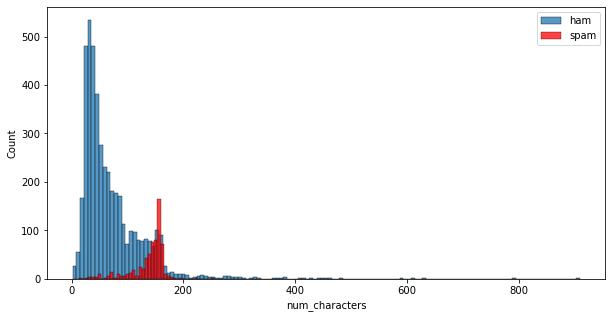

In [40]:
plt.figure(figsize=(10,5))
sns.histplot(df['num_characters'][df['label']==0])
sns.histplot(df['num_characters'][df['label']==1],color='red')
plt.legend(['ham','spam'])
plt.show()
#Here you can see most of Ham messages have less number of character
# Where as spam message have more number of character

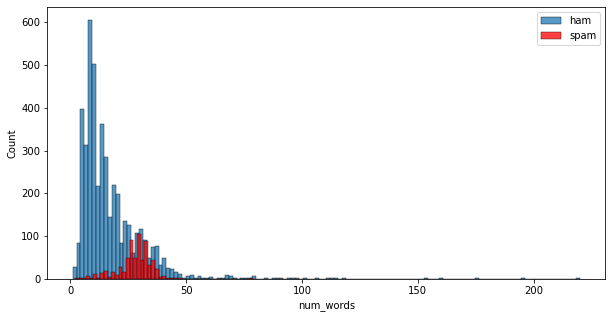

In [41]:
plt.figure(figsize=(10,5))
sns.histplot(df['num_words'][df['label']==0])
sns.histplot(df['num_words'][df['label']==1],color='red')
plt.legend(['ham','spam'])
plt.show()
#Here you can see most of Ham messages have less number of words
# Where as spam message have more number of words
# yes we have some outlier for ham

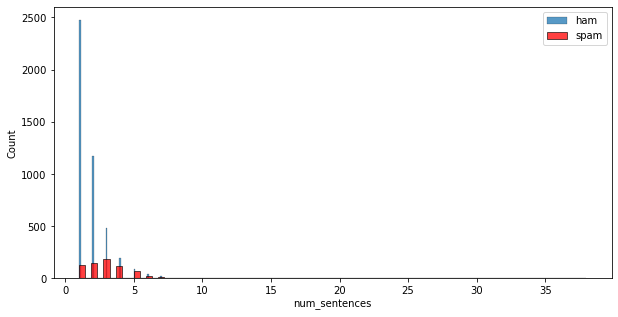

In [42]:
plt.figure(figsize=(10,5))
sns.histplot(df['num_sentences'][df['label']==0])
sns.histplot(df['num_sentences'][df['label']==1],color='red')
plt.legend(['ham','spam'])
plt.show()
#Here you can see most of Ham messages have less number of sentences
# Where as spam message have more number of sentences

In [43]:
# Lets check the relationship between differnet columns

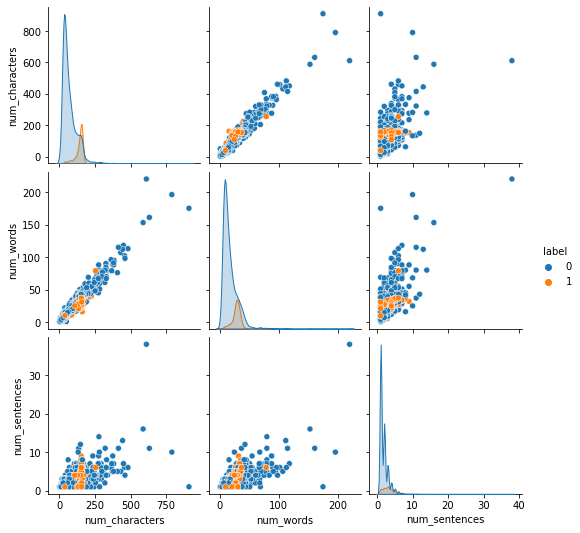

In [44]:
sns.pairplot(df,hue='label')

<AxesSubplot:>

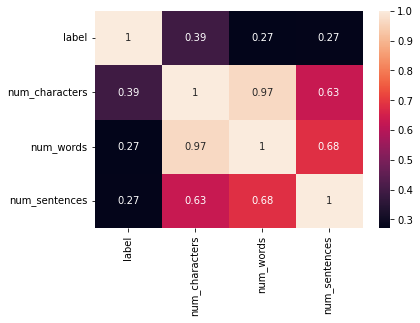

In [45]:
sns.heatmap(df.corr(),annot=True)

In [46]:
# Strong correlation between num_charaters, num_senetnces and num_words 
# we will only take one columns

# TEXT PREPROCESSING
## STEPS

### 1. Normalization of the sentences (convert the sentence in lower case)
### 2. Tokenization
### 3. Removing stopwords
### 4. Stemming
### 5. Converting Words to Vectors

In [47]:
df['message'][0].lower()

'go until jurong point, crazy.. available only in bugis n great world la e buffet... cine there got amore wat...'

In [48]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [49]:
data=df.copy()

In [50]:
data

,label,message,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5190,1,Holi Special Deal: 84% OFF on Full Body Checku...,154,37,6
5191,1,Along with quick delivery - use code PEH20. Hu...,108,25,4
5192,1,"While receiving an international call, if an I...",157,31,1
5193,1,During Vigilance Awareness Week (VAW)-2021 26t...,255,79,6


In [51]:
import re
ps=PorterStemmer()

In [52]:
def convert(sentences):
    corpus=[]
    for i in range(len(sentences)):
        review=re.sub('[^A-Za-z0-9]+',' ',sentences[i])
        review=review.lower()
        review=review.split()
        review=[ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
        review= ' '.join(review)
        corpus.append(review)
    return corpus

In [53]:
df['transform_text']=convert(data['message'])

C:\Users\adila\AppData\Local\Temp/ipykernel_8352/1734275797.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transform_text']=convert(data['message'])


In [54]:
df

,label,message,num_characters,num_words,num_sentences,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5190,1,Holi Special Deal: 84% OFF on Full Body Checku...,154,37,6,holi special deal 84 full bodi checkup vitamin...
5191,1,Along with quick delivery - use code PEH20. Hu...,108,25,4,along quick deliveri use code peh20 hurri offe...
5192,1,"While receiving an international call, if an I...",157,31,1,receiv intern call indian number number displa...
5193,1,During Vigilance Awareness Week (VAW)-2021 26t...,255,79,6,vigil awar week vaw 2021 26th octob 1st novemb...


In [55]:
#I have done all preprocessing steps except Vectroization

In [56]:
# First we will make word cloud for both Ham and Spam messages to see which type of words are used in both cases

In [57]:
from wordcloud import WordCloud

In [58]:
wc=WordCloud(width=400,
          height=400,
          min_font_size=10,
          background_color='white')

In [59]:
ham_cloud=wc.generate(df[df['label']==0]['transform_text'].str.cat(sep=' '))

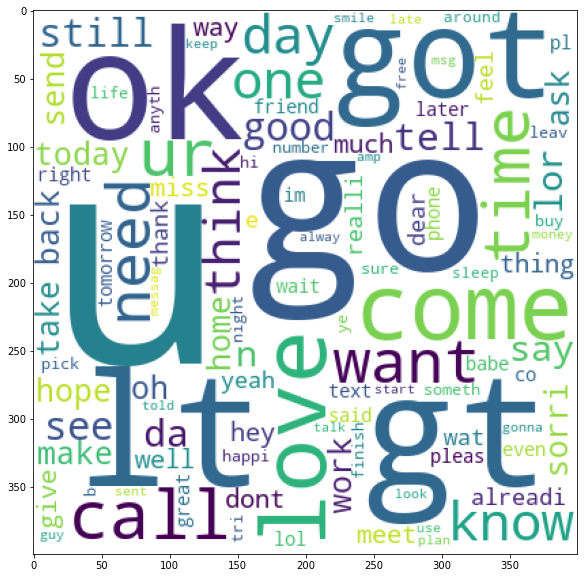

In [60]:
plt.figure(figsize=(15,10))
plt.imshow(ham_cloud)

In [61]:
spam_cloud=wc.generate(df[df['label']==1]['transform_text'].str.cat(sep=' '))

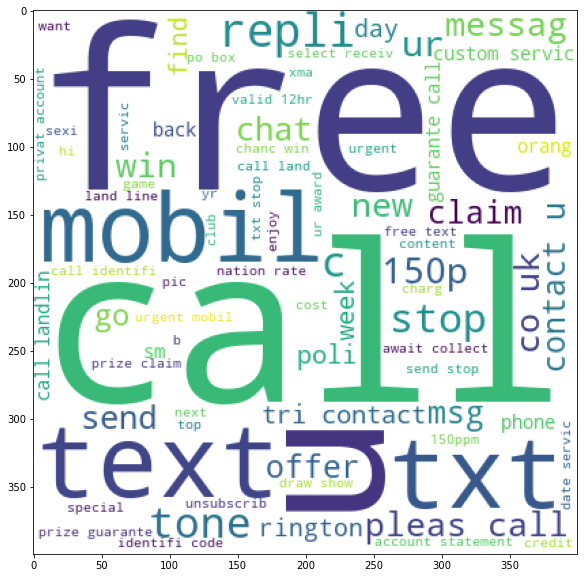

In [62]:
plt.figure(figsize=(15,10))
plt.imshow(spam_cloud)

In [63]:
ham_word=[]
for i in df[df['label']==0]['transform_text']:
    for j in i.split():
        ham_word.append(j)

In [64]:
ham_word

['go',
 'jurong',
 'point',
 'crazi',
 'avail',
 'bugi',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'cine',
 'got',
 'amor',
 'wat',
 'ok',
 'lar',
 'joke',
 'wif',
 'u',
 'oni',
 'u',
 'dun',
 'say',
 'earli',
 'hor',
 'u',
 'c',
 'alreadi',
 'say',
 'nah',
 'think',
 'goe',
 'usf',
 'live',
 'around',
 'though',
 'even',
 'brother',
 'like',
 'speak',
 'treat',
 'like',
 'aid',
 'patent',
 'per',
 'request',
 'mell',
 'mell',
 'oru',
 'minnaminungint',
 'nurungu',
 'vettam',
 'set',
 'callertun',
 'caller',
 'press',
 '9',
 'copi',
 'friend',
 'callertun',
 'gonna',
 'home',
 'soon',
 'want',
 'talk',
 'stuff',
 'anymor',
 'tonight',
 'k',
 'cri',
 'enough',
 'today',
 'search',
 'right',
 'word',
 'thank',
 'breather',
 'promis',
 'wont',
 'take',
 'help',
 'grant',
 'fulfil',
 'promis',
 'wonder',
 'bless',
 'time',
 'date',
 'sunday',
 'oh',
 'k',
 'watch',
 'eh',
 'u',
 'rememb',
 '2',
 'spell',
 'name',
 'ye',
 'v',
 'naughti',
 'make',
 'v',
 'wet',
 'fine',
 'way',
 'u

In [65]:
len(ham_word)

36228

In [66]:
from collections import Counter

In [67]:
# 30 Most Common ham words 
Counter(ham_word).most_common(30)

[('u', 915),
 ('go', 405),
 ('get', 354),
 ('2', 302),
 ('gt', 288),
 ('lt', 287),
 ('come', 276),
 ('ok', 255),
 ('call', 240),
 ('like', 236),
 ('know', 236),
 ('got', 226),
 ('love', 225),
 ('time', 223),
 ('good', 216),
 ('day', 212),
 ('want', 209),
 ('ur', 198),
 ('need', 174),
 ('4', 171),
 ('one', 165),
 ('lor', 159),
 ('home', 156),
 ('think', 150),
 ('take', 148),
 ('see', 147),
 ('still', 145),
 ('da', 143),
 ('k', 138),
 ('tell', 134)]

In [68]:
spam_word=[]
for i in df[df['label']==1]['transform_text']:
    for j in i.split():
        spam_word.append(j)

In [69]:
spam_word

['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 '2005',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 '1',
 '50',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 '900',
 'prize',
 'reward',
 'claim',
 'call',
 '09061701461',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 '20',
 '000',
 'pound',
 'txt',
 'csh11',
 'send',
 '87575',
 'cost',
 '150p',
 'day',
 '6day',
 '16',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 

In [70]:
len(spam_word)

12242

In [71]:
# 30 Most Common spam words 
Counter(spam_word).most_common(30)

[('call', 337),
 ('free', 199),
 ('2', 184),
 ('u', 147),
 ('txt', 145),
 ('text', 128),
 ('ur', 119),
 ('mobil', 118),
 ('4', 114),
 ('stop', 109),
 ('repli', 103),
 ('1', 98),
 ('claim', 98),
 ('prize', 83),
 ('www', 83),
 ('get', 81),
 ('min', 71),
 ('tone', 70),
 ('cash', 65),
 ('servic', 65),
 ('150p', 64),
 ('new', 64),
 ('uk', 63),
 ('send', 61),
 ('c', 60),
 ('nokia', 59),
 ('urgent', 58),
 ('msg', 58),
 ('week', 56),
 ('contact', 56)]

### Graphical Representation

In [72]:
pd.DataFrame(Counter(ham_word).most_common(30))

,0,1
0,u,915
1,go,405
2,get,354
3,2,302
4,gt,288
5,lt,287
6,come,276
7,ok,255
8,call,240
9,like,236


C:\Users\adila\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


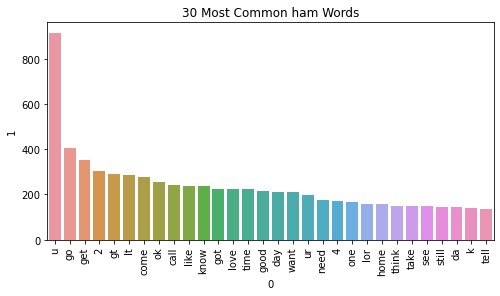

In [73]:
plt.figure(figsize=(8,4))
sns.barplot(pd.DataFrame(Counter(ham_word).most_common(30))[0],pd.DataFrame(Counter(ham_word).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.title('30 Most Common ham Words')
plt.show()

C:\Users\adila\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


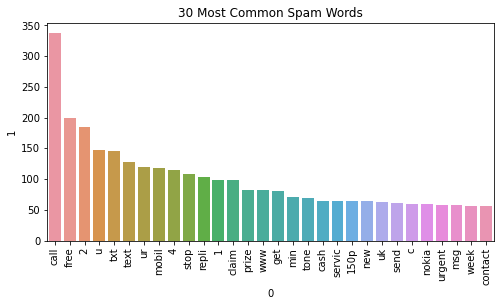

In [74]:
plt.figure(figsize=(8,4))
sns.barplot(pd.DataFrame(Counter(spam_word).most_common(30))[0],pd.DataFrame(Counter(spam_word).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.title('30 Most Common Spam Words')
plt.show()

# Text to Vectors

In [75]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [76]:
cv=CountVectorizer()
tfidf=TfidfVectorizer()

In [77]:
X=cv.fit_transform(df['transform_text']).toarray()# Beacuse it give sparse array and I convert it into dense array

In [78]:
X1=tfidf.fit_transform(df['transform_text']).toarray()

In [79]:
y=df['label'].values

In [80]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [81]:
y

array([0, 0, 1, ..., 1, 1, 1])

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
#Why not recall because here we want more focus on FP
#if imp mail it False predict Positive means spam then we can lose imp. mail
#if spam mail it False predict Negative means Ham then we will see a spam email but have less harm

In [83]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=2)

In [84]:
from sklearn.naive_bayes import MultinomialNB,GaussianNB,BernoulliNB #As i dont know the daat distrinution

In [85]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [86]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8623676612127045
[[768 129]
 [ 14 128]]
0.4980544747081712


In [87]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9749759384023099
[[885  12]
 [ 14 128]]
0.9142857142857143


In [88]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9701636188642926
[[894   3]
 [ 28 114]]
0.9743589743589743


# TFIDF

In [89]:
X_train,X_test,y_train,y_test=train_test_split(X1,y,test_size=0.20,random_state=2)

In [90]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8565928777670837
[[769 128]
 [ 21 121]]
0.4859437751004016


In [91]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.960538979788258
[[897   0]
 [ 41 101]]
1.0


In [92]:
#TFIDF is performing better

In [93]:
# precision is best
# Multinomial NB with Tfidf is best

In [94]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9701636188642926
[[894   3]
 [ 28 114]]
0.9743589743589743


In [95]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [96]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB

In [97]:
lrc=LogisticRegression()
dtc=DecisionTreeClassifier()
svc=SVC()
knc=KNeighborsClassifier()
abc=AdaBoostClassifier()
bc=BaggingClassifier()
etc=ExtraTreesClassifier()
gbc=GradientBoostingClassifier()
rfc=RandomForestClassifier()
xgbc=XGBClassifier()
mnb=MultinomialNB()

In [98]:
def model(clf,X_train,Y_train,X_test,Y_test):
    clf.fit(X_train,Y_train)
    Y_pred=clf.predict(X_test)
    accuracy=accuracy_score(Y_test,Y_pred)
    precision=precision_score(Y_test,Y_pred)
    
    return accuracy,precision
    

In [99]:
model(lrc,X_train,y_train,X_test,y_test)

(0.9509143407122232, 0.989247311827957)

In [100]:
clf={
    'LogisticRegression':lrc,
    'DecisionTreeClassifier':dtc,
    'SVC':svc,
    'KNeighborsClassifier':knc,
    'AdaBoostClassifier':abc,
    'BaggingClassifier':bc,
    'ExtraTreesClassifier':etc,
    'GradientBoostingClassifier':gbc,
    'RandomForestClassifier':rfc,
    'XGBClassifier':xgbc,
    'MultinomialNB':mnb
    
}

In [101]:
for i in clf.values():
    print(i)

LogisticRegression()
DecisionTreeClassifier()
SVC()
KNeighborsClassifier()
AdaBoostClassifier()
BaggingClassifier()
ExtraTreesClassifier()
GradientBoostingClassifier()
RandomForestClassifier()
XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None,
              enable_categorical=False, gamma=None, gpu_id=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, reg_alpha=None,
              reg_lambda=None, scale_pos_weight=None, subsample=None,
              tree_method=None, validate_parameters=None, verbosity=None)
MultinomialNB()


In [102]:
model(clf.values(),X_train,y_train,X_test,y_test)

AttributeError: 'dict_values' object has no attribute 'fit'

In [106]:
clf.items()

dict_items([('LogisticRegression', LogisticRegression()), ('DecisionTreeClassifier', DecisionTreeClassifier()), ('SVC', SVC()), ('KNeighborsClassifier', KNeighborsClassifier()), ('AdaBoostClassifier', AdaBoostClassifier()), ('BaggingClassifier', BaggingClassifier()), ('ExtraTreesClassifier', ExtraTreesClassifier()), ('GradientBoostingClassifier', GradientBoostingClassifier()), ('RandomForestClassifier', RandomForestClassifier()), ('XGBClassifier', XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None,
              enable_categorical=False, gamma=None, gpu_id=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, reg_alpha=None,
      

In [107]:
accuracies=[]
precisions=[]
model_name=[]
def fit(clf,X_train,y_train,X_test,y_test):
    for name,clf_obj in clf.items():
        accuracy,precision=model(clf_obj,X_train,y_train,X_test,y_test)
        accuracies.append(accuracy)
        precisions.append(precision)
        model_name.append(name)
    return model_name,accuracies,precisions

In [108]:
fit(clf,X_train,y_train,X_test,y_test)

C:\Users\adila\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:08:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


(['LogisticRegression',
  'DecisionTreeClassifier',
  'SVC',
  'KNeighborsClassifier',
  'AdaBoostClassifier',
  'BaggingClassifier',
  'ExtraTreesClassifier',
  'GradientBoostingClassifier',
  'RandomForestClassifier',
  'XGBClassifier',
  'MultinomialNB'],
 [0.9509143407122232,
  0.9643888354186718,
  0.9672762271414822,
  0.890279114533205,
  0.9692011549566891,
  0.9643888354186718,
  0.9759384023099134,
  0.9682386910490857,
  0.973051010587103,
  0.973051010587103,
  0.960538979788258],
 [0.989247311827957,
  0.8832116788321168,
  0.990909090909091,
  1.0,
  0.9508196721311475,
  0.9069767441860465,
  0.9915966386554622,
  0.9823008849557522,
  0.9913793103448276,
  0.9596774193548387,
  1.0])

In [111]:
performance=pd.DataFrame(data=[model_name,accuracies,precisions]).T
performance.rename(columns={0:'algorithm',1:'accuracy',2:'precision'},inplace=True)

In [112]:
performance

,algorithm,accuracy,precision
0,LogisticRegression,0.950914,0.989247
1,DecisionTreeClassifier,0.964389,0.883212
2,SVC,0.967276,0.990909
3,KNeighborsClassifier,0.890279,1.0
4,AdaBoostClassifier,0.969201,0.95082
5,BaggingClassifier,0.964389,0.906977
6,ExtraTreesClassifier,0.975938,0.991597
7,GradientBoostingClassifier,0.968239,0.982301
8,RandomForestClassifier,0.973051,0.991379
9,XGBClassifier,0.973051,0.959677


C:\Users\adila\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


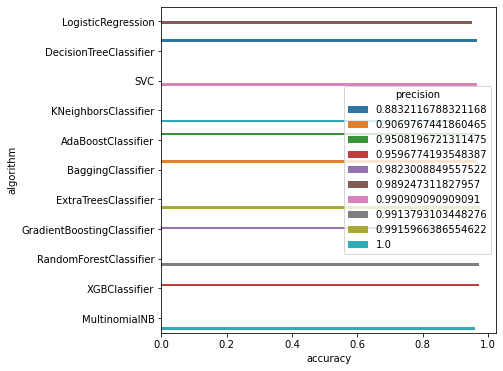

In [113]:
plt.figure(figsize=(6,6))
sns.barplot(performance['accuracy'],performance['algorithm'],hue=performance['precision'])
plt.show()

In [114]:
performance.head()

,algorithm,accuracy,precision
0,LogisticRegression,0.950914,0.989247
1,DecisionTreeClassifier,0.964389,0.883212
2,SVC,0.967276,0.990909
3,KNeighborsClassifier,0.890279,1.0
4,AdaBoostClassifier,0.969201,0.95082


In [115]:
performance_df1 = pd.melt(performance, id_vars = "algorithm")
#Explode a DataFrame from list-like columns to long format

In [116]:
performance_df1

,algorithm,variable,value
0,LogisticRegression,accuracy,0.950914
1,DecisionTreeClassifier,accuracy,0.964389
2,SVC,accuracy,0.967276
3,KNeighborsClassifier,accuracy,0.890279
4,AdaBoostClassifier,accuracy,0.969201
5,BaggingClassifier,accuracy,0.964389
6,ExtraTreesClassifier,accuracy,0.975938
7,GradientBoostingClassifier,accuracy,0.968239
8,RandomForestClassifier,accuracy,0.973051
9,XGBClassifier,accuracy,0.973051


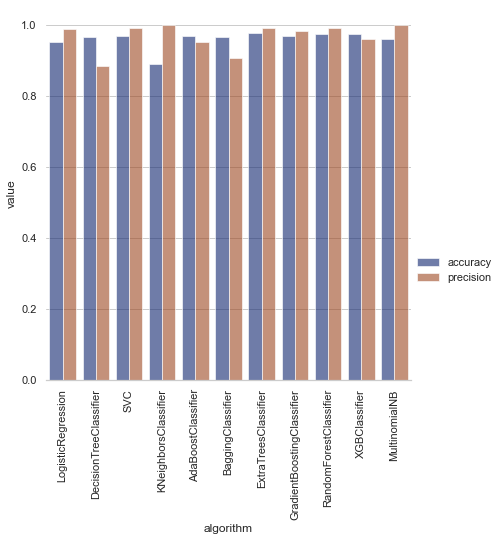

In [117]:
sns.set_theme(style="whitegrid")

# Draw a nested barplot by species and sex
g = sns.catplot(
    data=performance_df1, kind="bar",
    x="algorithm", y='value', hue="variable",
    ci="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
plt.xticks(rotation='vertical')
g.legend.set_title("")

# 1. Modification in model(imporving the model)
### 1.tfidf max_features

In [119]:
df

,label,message,num_characters,num_words,num_sentences,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5190,1,Holi Special Deal: 84% OFF on Full Body Checku...,154,37,6,holi special deal 84 full bodi checkup vitamin...
5191,1,Along with quick delivery - use code PEH20. Hu...,108,25,4,along quick deliveri use code peh20 hurri offe...
5192,1,"While receiving an international call, if an I...",157,31,1,receiv intern call indian number number displa...
5193,1,During Vigilance Awareness Week (VAW)-2021 26t...,255,79,6,vigil awar week vaw 2021 26th octob 1st novemb...


In [120]:
y=df['label'].values

In [181]:
tfidf=TfidfVectorizer(max_features=3500)

In [182]:
X=tfidf.fit_transform(df['transform_text']).toarray()

In [183]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=2)

In [184]:
model_list=[]
accuracy_list=[]
precision_list=[]
def fit(clf,X_train,y_train,X_test,y_test):
    for name,clf_obj in clf.items():
        accuracy,precision=model(clf_obj,X_train,y_train,X_test,y_test)
        accuracy_list.append(accuracy)
        precision_list.append(precision)
        model_list.append(name)
    return model_list,accuracy_list,precision_list

In [185]:
fit(clf,X_train,y_train,X_test,y_test)

C:\Users\adila\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:55:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


(['LogisticRegression',
  'DecisionTreeClassifier',
  'SVC',
  'KNeighborsClassifier',
  'AdaBoostClassifier',
  'BaggingClassifier',
  'ExtraTreesClassifier',
  'GradientBoostingClassifier',
  'RandomForestClassifier',
  'XGBClassifier',
  'MultinomialNB'],
 [0.9576515880654476,
  0.9643888354186718,
  0.9740134744947064,
  0.9027911453320501,
  0.9663137632338787,
  0.9595765158806545,
  0.9778633301251203,
  0.9615014436958614,
  0.9759384023099134,
  0.9701636188642926,
  0.9759384023099134],
 [0.99,
  0.8888888888888888,
  0.9914529914529915,
  1.0,
  0.9421487603305785,
  0.9098360655737705,
  0.983739837398374,
  0.9811320754716981,
  0.9915966386554622,
  0.944,
  1.0])

In [187]:
performance1=pd.DataFrame(data=[model_list,accuracy_list,precision_list]).T
performance1.rename(columns={0:"algorithm",1:'accuracy_3500feature',2:'precision_3500feature'},inplace=True)

In [188]:
performance1

,algorithm,accuracy_3500feature,precision_3500feature
0,LogisticRegression,0.957652,0.99
1,DecisionTreeClassifier,0.964389,0.888889
2,SVC,0.974013,0.991453
3,KNeighborsClassifier,0.902791,1.0
4,AdaBoostClassifier,0.966314,0.942149
5,BaggingClassifier,0.959577,0.909836
6,ExtraTreesClassifier,0.977863,0.98374
7,GradientBoostingClassifier,0.961501,0.981132
8,RandomForestClassifier,0.975938,0.991597
9,XGBClassifier,0.970164,0.944


In [189]:
performance=performance1.merge(performance,on='algorithm')
performance

,algorithm,accuracy_3500feature,precision_3500feature,accuracy_3700feature,precision_3700feature,accuracy,precision
0,LogisticRegression,0.957652,0.99,0.957652,0.99,0.950914,0.989247
1,DecisionTreeClassifier,0.964389,0.888889,0.959577,0.852113,0.964389,0.883212
2,SVC,0.974013,0.991453,0.974976,0.991525,0.967276,0.990909
3,KNeighborsClassifier,0.902791,1.0,0.897979,1.0,0.890279,1.0
4,AdaBoostClassifier,0.966314,0.942149,0.964389,0.926829,0.969201,0.95082
5,BaggingClassifier,0.959577,0.909836,0.957652,0.871212,0.964389,0.906977
6,ExtraTreesClassifier,0.977863,0.98374,0.980751,0.991935,0.975938,0.991597
7,GradientBoostingClassifier,0.961501,0.981132,0.967276,0.990909,0.968239,0.982301
8,RandomForestClassifier,0.975938,0.991597,0.974976,0.991525,0.973051,0.991379
9,XGBClassifier,0.970164,0.944,0.972089,0.952,0.973051,0.959677


In [190]:
#MultinomialNB accuracy have increased without decreasing precision

# 2. Modification in model
### Scaling X

In [191]:
#not using Standard scaler as it also gives -ve values and NAive Bayes don't except -ve values
# We will use MinMax Scaler  x(i)-max(x)/max(x)-min(x) ---> gives values between 0 to 1

In [192]:
tfidf=TfidfVectorizer(max_features=3500)
X=tfidf.fit_transform(df['transform_text']).toarray()

In [193]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X=scaler.fit_transform(X)

In [194]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [195]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=2)

In [196]:
model_list=[]
accuracy_list=[]
precision_list=[]
def fit(clf,X_train,y_train,X_test,y_test):
    for name,clf_obj in clf.items():
        accuracy,precision=model(clf_obj,X_train,y_train,X_test,y_test)
        accuracy_list.append(accuracy)
        precision_list.append(precision)
        model_list.append(name)
    return model_list,accuracy_list,precision_list

In [197]:
fit(clf,X_train,y_train,X_test,y_test)

C:\Users\adila\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:59:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


(['LogisticRegression',
  'DecisionTreeClassifier',
  'SVC',
  'KNeighborsClassifier',
  'AdaBoostClassifier',
  'BaggingClassifier',
  'ExtraTreesClassifier',
  'GradientBoostingClassifier',
  'RandomForestClassifier',
  'XGBClassifier',
  'MultinomialNB'],
 [0.971126082771896,
  0.9576515880654476,
  0.9740134744947064,
  0.9018286814244466,
  0.9663137632338787,
  0.9624639076034649,
  0.9759384023099134,
  0.9643888354186718,
  0.9749759384023099,
  0.9701636188642926,
  0.9826756496631376],
 [1.0,
  0.8656716417910447,
  0.967479674796748,
  1.0,
  0.9421487603305785,
  0.8931297709923665,
  0.975609756097561,
  0.9906542056074766,
  0.9915254237288136,
  0.944,
  0.9769230769230769])

In [198]:
performance2=pd.DataFrame(data=[model_list,accuracy_list,precision_list]).T
performance2.rename(columns={0:"algorithm",1:'accuracy_3500f_scaled',2:'precision_3500f_scaled'},inplace=True)

In [199]:
performance2.merge(performance,on='algorithm')#Scaling is not useful

,algorithm,accuracy_3500f_scaled,precision_3500f_scaled,accuracy_3500feature,precision_3500feature,accuracy_3700feature,precision_3700feature,accuracy,precision
0,LogisticRegression,0.971126,1.0,0.957652,0.99,0.957652,0.99,0.950914,0.989247
1,DecisionTreeClassifier,0.957652,0.865672,0.964389,0.888889,0.959577,0.852113,0.964389,0.883212
2,SVC,0.974013,0.96748,0.974013,0.991453,0.974976,0.991525,0.967276,0.990909
3,KNeighborsClassifier,0.901829,1.0,0.902791,1.0,0.897979,1.0,0.890279,1.0
4,AdaBoostClassifier,0.966314,0.942149,0.966314,0.942149,0.964389,0.926829,0.969201,0.95082
5,BaggingClassifier,0.962464,0.89313,0.959577,0.909836,0.957652,0.871212,0.964389,0.906977
6,ExtraTreesClassifier,0.975938,0.97561,0.977863,0.98374,0.980751,0.991935,0.975938,0.991597
7,GradientBoostingClassifier,0.964389,0.990654,0.961501,0.981132,0.967276,0.990909,0.968239,0.982301
8,RandomForestClassifier,0.974976,0.991525,0.975938,0.991597,0.974976,0.991525,0.973051,0.991379
9,XGBClassifier,0.970164,0.944,0.970164,0.944,0.972089,0.952,0.973051,0.959677


## Voting CLassifier

In [200]:
tfidf=TfidfVectorizer(max_features=3500)

In [201]:
X=tfidf.fit_transform(df['transform_text']).toarray()

In [202]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=2)

In [203]:
y=df['label'].values

In [204]:
from sklearn.ensemble import VotingClassifier

In [205]:
#voting type =Hard

In [206]:
voting=VotingClassifier(estimators=[('SVM',svc),('MNB',mnb),('RFC',rfc),('LogisticRegression',lrc),('KNN',knc)],voting='hard')

In [207]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('SVM', SVC(probability=True)),
                             ('MNB', MultinomialNB()),
                             ('RFC', RandomForestClassifier()),
                             ('LogisticRegression', LogisticRegression()),
                             ('KNN', KNeighborsClassifier())])

In [208]:
pred=voting.predict(X_test)
print('accuracy: ',accuracy_score(y_test,pred))
print('precision: ',precision_score(y_test,pred))

accuracy:  0.971126082771896
precision:  1.0


In [209]:
#Multinomial performs better than this 

In [210]:
#SoftVoting

In [211]:
svc=SVC(probability=True) #probability=True Must for soft voting otherwise predict_proba error

In [212]:
voting=VotingClassifier(estimators=[('SVM',svc),('MNB',mnb),('RFC',rfc),('LogisticRegression',lrc),('KNN',knc)],voting='soft')

In [213]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('SVM', SVC(probability=True)),
                             ('MNB', MultinomialNB()),
                             ('RFC', RandomForestClassifier()),
                             ('LogisticRegression', LogisticRegression()),
                             ('KNN', KNeighborsClassifier())],
                 voting='soft')

In [214]:
pred=voting.predict(X_test)
print('accuracy: ',accuracy_score(y_test,pred))
print('precision: ',precision_score(y_test,pred))

accuracy:  0.9778633301251203
precision:  1.0


In [215]:
#Multinomial performs better than this 

## Stacking classifer

In [216]:
estimators=[('SVM',svc),('MNB',mnb),('LogisticRegression',lrc),('KNN',knc)]

In [217]:
final_estimator=RandomForestClassifier()

In [218]:
from sklearn.ensemble import StackingClassifier

In [219]:
stack=StackingClassifier(estimators=estimators,final_estimator=final_estimator)

In [220]:
stack.fit(X_train,y_train)

StackingClassifier(estimators=[('SVM', SVC(probability=True)),
                               ('MNB', MultinomialNB()),
                               ('LogisticRegression', LogisticRegression()),
                               ('KNN', KNeighborsClassifier())],
                   final_estimator=RandomForestClassifier())

In [221]:
stack_pred=stack.predict(X_test)
print('accuracy: ',accuracy_score(y_test,stack_pred))
print('precision: ',precision_score(y_test,stack_pred))

accuracy:  0.9797882579403272
precision:  0.9548872180451128


In [222]:
#Multinomial performs better than this 

In [223]:
tfidf=TfidfVectorizer()

In [224]:
y=df['label'].values
tfidf=TfidfVectorizer(max_features=3500)
X=tfidf.fit_transform(df['transform_text']).toarray()

In [225]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [226]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=2)

In [227]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [228]:
mnb.fit(X_train,y_train)

MultinomialNB()

In [229]:
mnb_pred=mnb.predict(X_test)
print(accuracy_score(y_test,mnb_pred))
print(precision_score(y_test,mnb_pred))

0.9759384023099134
1.0


In [230]:
#Files to pickle
#1. Tfidf Vectorizer
#2. Multinomial NB Model

In [231]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

In [301]:
def convert(sentences):
    corpus=[]
    for i in range(len(sentences)):
        review=re.sub('[^A-Za-z0-9]+',' ',sentences[i])
        review=review.lower()
        review=review.split()
        review=[ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
        review= ' '.join(review)
        corpus.append(review)
    return corpus

In [238]:
input_text=convert(["free gift worth 2000$ contact at this number"])
input_text

['free gift worth 2000 contact number']

In [239]:
vector=tfidf.transform(input_text).toarray()

In [240]:
mnb.predict(vector)[0]

1

In [275]:
df.loc[2,['message','label']]

message    Free entry in 2 a wkly comp to win FA Cup fina...
label                                                      1
Name: 2, dtype: object

In [276]:
df['message'][2]

"Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"